<h1>Lexical Resources</h1>

<p>A super useful example here is how the set() function can allow us to subtract certain words from analysis sets and focus on more representative words.</p>

In [6]:
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import words
from nltk.corpus import stopwords

In [8]:
print(words.words()[0:10])
print(stopwords.words('english')[0:10])

['A', 'a', 'aa', 'aal', 'aalii', 'aam', 'Aani', 'aardvark', 'aardwolf', 'Aaron']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [3]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    
    return sorted(unusual)

In [5]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[0:10]

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations']

<p>The following function computes the fraction of words in a text that are not hyper-common "stopwords".</p>

In [16]:
def content_fraction(text):
    stop_ws = stopwords.words('english')
    content = [word for word in text if word.lower() not in stop_ws]
    fraction = len(content) / len(text)
    
    print("%.3f%% of words in the text were considered content words"
         % (fraction * 100))
    
    return fraction

In [17]:
content_fraction(nltk.corpus.reuters.words())

73.524% of words in the text were considered content words


0.735240435097661

In [19]:
names = nltk.corpus.names
print(names.fileids())

['female.txt', 'male.txt']


In [22]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

overlap_names = [w for w in male_names if w in female_names]

print(overlap_names[-10:])

['Wallie', 'Wallis', 'Wally', 'Whitney', 'Willi', 'Willie', 'Willy', 'Winnie', 'Winny', 'Wynn']


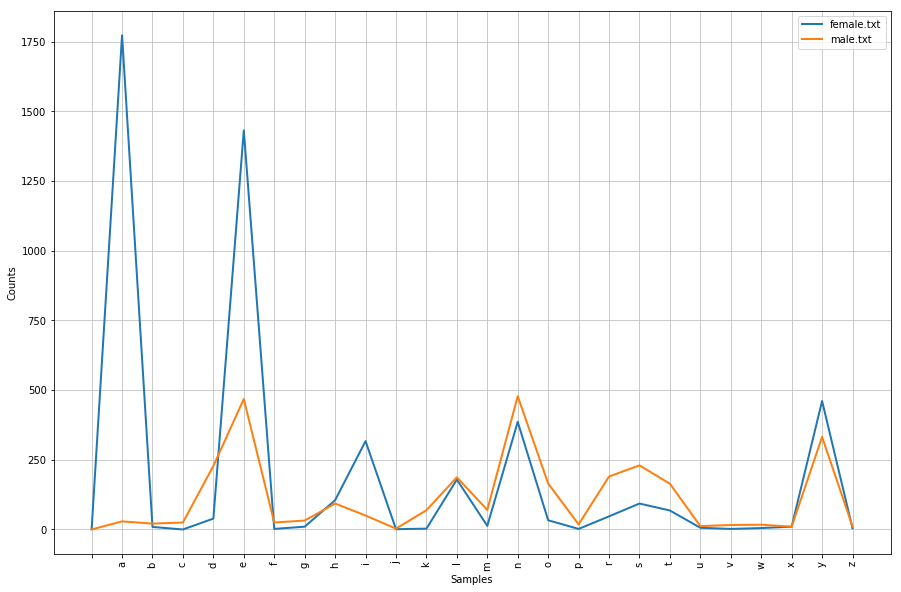

In [24]:
plt.figure(figsize=(15,10))
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid)
)
cfd.plot()
plt.show()